<a href="https://colab.research.google.com/github/abbyWoot/AML/blob/master/AML_Project6_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")# 

In [0]:
# Files
DOWNLOAD_ROOT = "http://cs.joensuu.fi/sipu/datasets/"
BRIDGE = DOWNLOAD_ROOT + "bridge.txt"
BRIDGE25 = DOWNLOAD_ROOT + "br25.txt" 
BRIDGE75 = DOWNLOAD_ROOT + "br75.txt"
HOUSE = DOWNLOAD_ROOT + "housec8.txt"
MISS_AMERICA1 = DOWNLOAD_ROOT + "missa1.txt"
MISS_AMERICA2 = DOWNLOAD_ROOT + "missa2.txt"
EUROPE = DOWNLOAD_ROOT + "europediff.txt"

import urllib.request

def get_text(url):
  response = urllib.request.urlopen(url)
  data = response.read()
  decoded = data.decode('utf-8')
  return decoded;

# BRIDGE
bridge_txt = get_text(BRIDGE)
bridge_training_x_txt = get_text(BRIDGE25)
bridge_training_y_txt = get_text(BRIDGE75)

# HOUSE
house_txt = get_text(HOUSE)

# MISS AMERICA
missa1_txt = get_text(MISS_AMERICA1)
missa2_txt = get_text(MISS_AMERICA2)

# EUROPE
europe_txt = get_text(EUROPE)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import cv2 as cv
import numpy as np


[[  6   8]
 [  6   9]
 [  0   0]
 ...
 [252 254]
 [232 246]
 [233 227]]


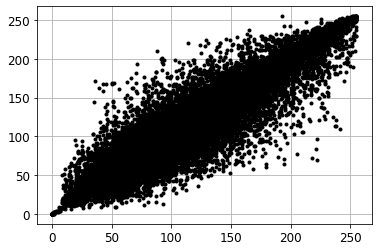

In [139]:
bridge_data = np.fromstring(bridge_txt, int, sep = " ")
bridge_data = np.reshape(bridge_data, (-1, 2))
print(bridge_data)

bridge_x=bridge_data[:,0]    
bridge_y=bridge_data[:,-1] 
plt.figure()
plt.grid(True)
plt.plot(bridge_x, bridge_y,'k.')

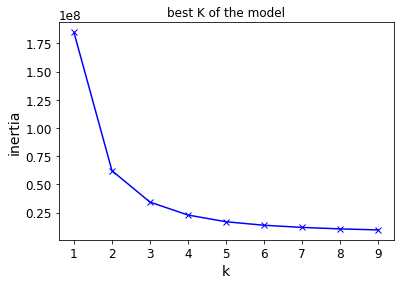

In [140]:
K = range(1, 10)
meandistortions = []
inertia= []
for k in K:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0)
    kmeans.fit(bridge_data)

    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('best K of the model');

[[ 26  20]
 [ 45  28]
 [  5  46]
 ...
 [234 243]
 [228 234]
 [245 225]]


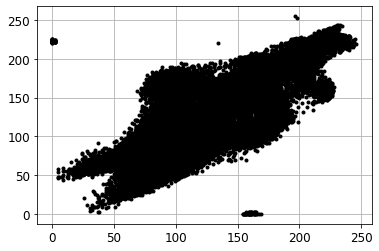

In [0]:
house_data = np.fromstring(house_txt, int, sep = " ")
house_data = np.reshape(house_data, (-1, 2))
print(house_data)

house_x=house_data[:,0]    
house_y=house_data[:,-1] 
plt.figure()
plt.grid(True)
plt.plot(house_x, house_y,'k.')

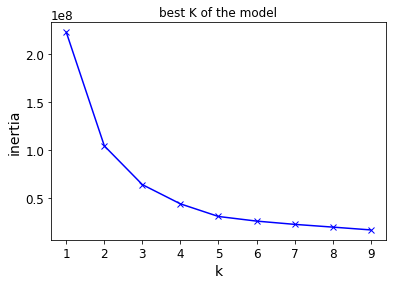

In [141]:
K = range(1, 10)
meandistortions = []
inertia= []
for k in K:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0)
    kmeans.fit(house_data)

    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('best K of the model');

[[ 84 103]
 [136 131]
 [ 94  87]
 ...
 [133 128]
 [130 132]
 [119 133]]


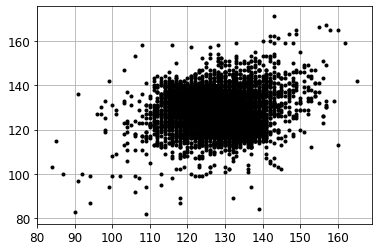

In [0]:
missa1_data = np.fromstring(missa1_txt, int, sep = " ")
missa1_data = np.reshape(missa1_data, (-1, 2))
print(missa1_data)

missa1_x=missa1_data[:,0]    
missa1_y=missa1_data[:,-1] 
plt.figure()
plt.grid(True)
plt.plot(missa1_x, missa1_y,'k.')

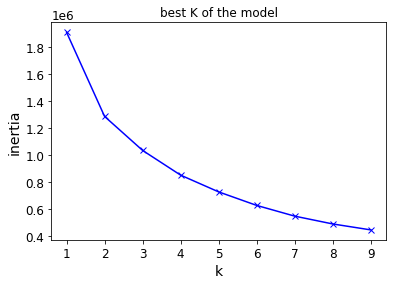

In [142]:
K = range(1, 10)
meandistortions = []
inertia= []
for k in K:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0)
    kmeans.fit(missa1_data)

    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('best K of the model');

[[571201 676146]
 [577084 679116]
 [581673 683608]
 ...
 [575875 668889]
 [569905 668427]
 [577422 671639]]


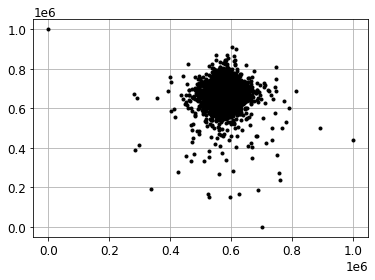

In [0]:
europe_data = np.fromstring(europe_txt, int, sep = " ")
europe_data = np.reshape(europe_data, (-1, 2))
print(europe_data)

europe_x=europe_data[:,0]    
europe_y=europe_data[:,-1] 
plt.figure()
plt.grid(True)
plt.plot(europe_x, europe_y,'k.')

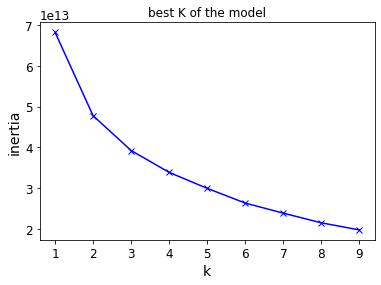

In [143]:
K = range(1, 10)
meandistortions = []
inertia= []
for k in K:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0)
    kmeans.fit(europe_data)

    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('best K of the model');